In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
'''
def dimension_2_random_walk(X):
    for U in range(1,5):
        U = np.random.randint(U) + 1
    
    if U == 1:
        X[0] += 1
    if U == 2:
        X[0] -= 1
    if U == 3:
        X[1] += 1
    if U == 4:
        X[1] += 1
        '''
        
def dimension_2_random_walk(X):
    U = np.random.random()
    if U > 0.5:
        if U > 0.75:
            X[0] += 1
        else:
            X[0] -= 1
    else:
        if U > 0.25:
            X[1] += 1
        else:
            X[1] -= 1

In [3]:
n = 30000
X = [0,0]
trajectoire = []
trajectoire.append(tuple(X))
longueurs = []
nbr_sections = 0
longueur = 0

while nbr_sections < n:
    
    dimension_2_random_walk(X)
    
    if tuple(X) in trajectoire:
        longueurs.append(longueur)
        nbr_sections += 1
        longueur = 0
    else:
        longueur += 1
    
    trajectoire.append(tuple(X))


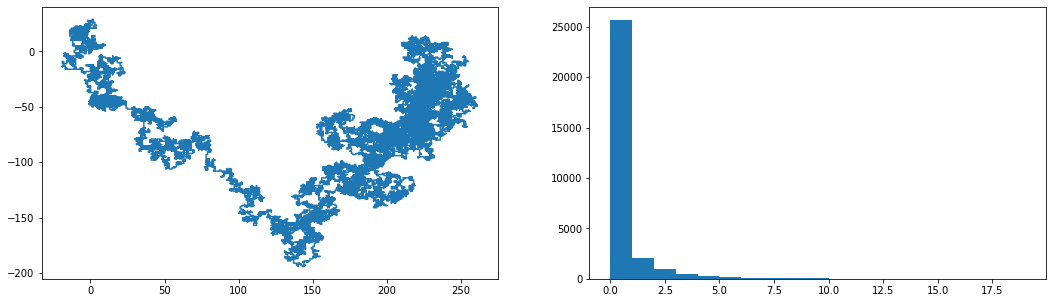

In [4]:
x = list()
y = list()

for i in range(len(trajectoire)):
    x.append(trajectoire[i][0])
    y.append(trajectoire[i][1])

fig, (ax1,ax2) = plt.subplots(1,2,figsize = (18,5))
ax1.plot(x,y)
ax2.hist(longueurs,bins=range(20))
plt.show()

In [5]:
proportions = []

for i in range(30):
    proportions.append({})
    for n in range(10):
        proportions[i][n] = longueurs[i*1000:(i+1)*1000].count(n)/10


import pandas as pd
proportions = pd.DataFrame(proportions)

proportions.describe()

,0,1,2,3,4,5,6,7,8,9
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000
mean,85.610000,6.810000,3.233333,1.516667,1.086667,0.650000,0.393333,0.26000,0.166667,0.106667
std,5.546875,2.097511,1.410144,0.713942,0.682659,0.421614,0.270291,0.20778,0.153877,0.122990
min,75.000000,1.300000,0.700000,0.200000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,81.425000,5.900000,2.325000,1.025000,0.600000,0.325000,0.200000,0.10000,0.025000,0.000000
50%,85.650000,7.100000,3.150000,1.600000,1.150000,0.600000,0.350000,0.30000,0.100000,0.100000
75%,89.850000,8.300000,4.175000,2.050000,1.400000,0.975000,0.600000,0.40000,0.200000,0.200000
max,97.800000,10.100000,6.600000,3.100000,2.400000,1.400000,0.900000,0.80000,0.500000,0.500000


In [6]:
def liste_aleatoire(d,k):
    '''Fonction qui renvoie une liste composée de k 1, k 2, …, k (2d) dans
    un ordre aléatoire.'''
    liste_directions = []
    for i in range(2*d):
        liste_directions = liste_directions + k*[i+1]

    for t in range(2*d*k):
        '''On génère I aléatoire uniformément dans t, t+1, …, 12'''
        I = np.random.randint(t,2*d*k+1)
        a = liste_directions[t]
        liste_directions[t] = liste_directions[I-1]
        liste_directions[I-1] = a

    return liste_directions

In [7]:
d = 2
k = 2

n = 3000
X = [[0,0] for t in range(2*d*k)]
trajectoires = [[(0,0)] for t in range(2*d*k)]

longueurs = [[] for t in range(2*d*k)]
nbr_sections = [0 for t in range(2*d*k)]
longueur = [0 for t in range(2*d*k)]

while nbr_sections[0] < n:
    
    '''On calcule la liste aléatoire qui va définir le mouvement de chacune
    des 2*d*k trajectoires'''
    liste_alea = liste_aleatoire(2,2)
    
    for i in range(len(trajectoires)):
        
        X[i][((liste_alea[i]-1)//2)-1] += 2*((liste_alea[i] % 2) - 0.5)
    
        if tuple(X[i]) in trajectoires[i]:
            longueurs[i].append(longueur[i])
            nbr_sections[i] += 1
            longueur[i] = 0
        else:
            longueur[i] += 1
    
        trajectoires[i].append(tuple(X[i]))

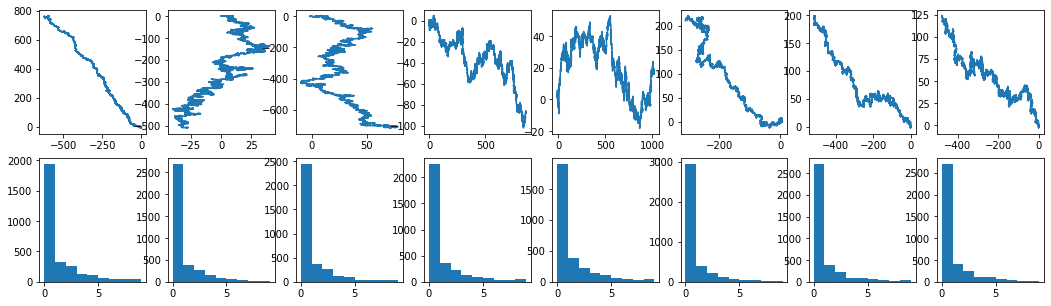

In [8]:
fig, (ax1,ax2) = plt.subplots(2,8,figsize = (18,5))

for t in range(8):
    x = list()
    y = list()

    for i in range(len(trajectoires[0])):
        x.append(trajectoires[t][i][0])
        y.append(trajectoires[t][i][1])

    ax1[t].plot(x,y)
    ax2[t].hist(longueurs[t],bins=range(10))
plt.show()